In [3]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
from vega_datasets import data
df = data.sf_temps()

df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [6]:
df.shape

(8759, 2)

#### Question 1: Resample by the day and take the average temperature. Visualize the average temperature over time.

In [9]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p') ## converting to date time

df.date ## maiking sure we have a date time

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [11]:
## setting date as index and sorting for vis purposes

df = df.set_index('date').sort_index()  

In [12]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [13]:
df.resample('D').mean() #resample the whole dataframe using day and mean as an aggregator

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


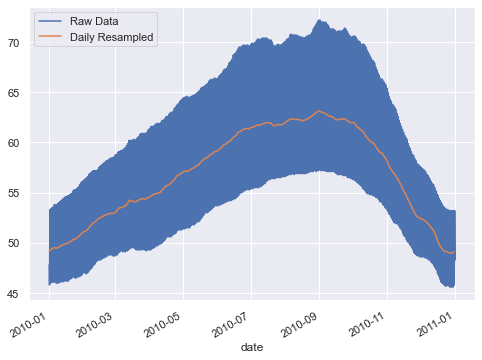

In [19]:
df.temp.plot(label = 'Raw Data')
df.resample('D').mean().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Question 2: Write the code necessary to visualize the minimum temperature over time.

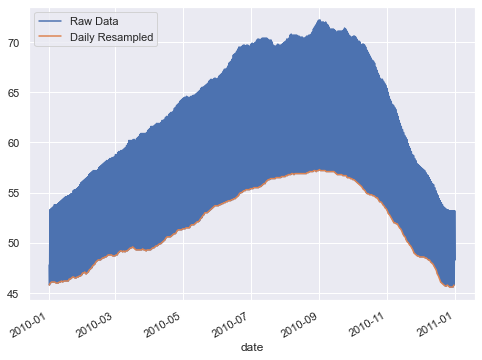

In [20]:
df.temp.plot(label = 'Raw Data')
df.resample('D').min().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Question 3: Write the code necessary to visualize the maximum temperature over time.


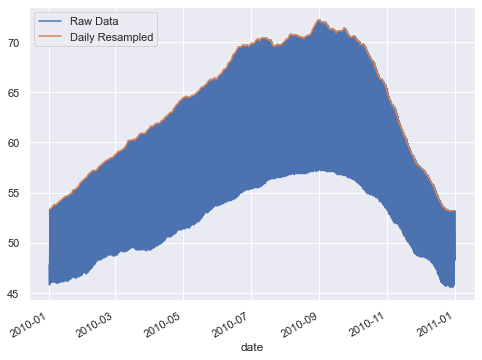

In [21]:
df.temp.plot(label = 'Raw Data')
df.resample('D').max().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Combining One, Two, and Three

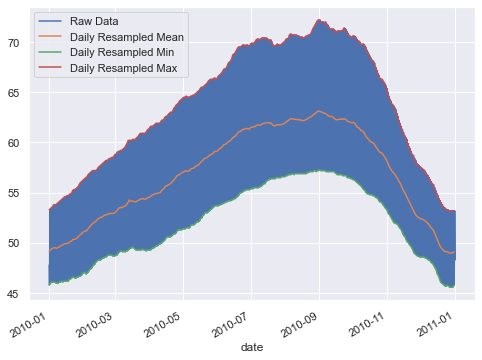

In [23]:
df.temp.plot(label = 'Raw Data')
df.resample('D').mean().temp.plot(label = 'Daily Resampled Mean')
df.resample('D').min().temp.plot(label = 'Daily Resampled Min')
df.resample('D').max().temp.plot(label = 'Daily Resampled Max')
plt.legend()
plt.show()

#### Question 4: Which month is the coldest, on average?


In [24]:
df.resample('M').mean().sort_values(by = 'temp') ## code answer 

,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


<AxesSubplot:xlabel='date'>

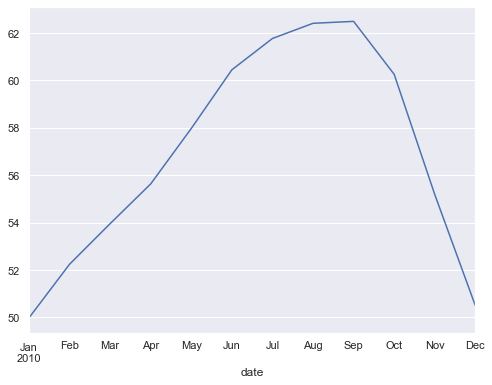

In [25]:
df.resample('M').mean().temp.plot() ## Visual Answer

The coldest month on average is January

#### Question 5: Which month has the highest average temperature?


In [26]:
df.resample('M').mean().sort_values(by = 'temp', ascending = False) ## code answer

,temp
date,
2010-09-30,62.49
2010-08-31,62.41
2010-07-31,61.77
2010-06-30,60.44
2010-10-31,60.25
2010-05-31,57.97
2010-04-30,55.63
2010-11-30,55.19
2010-03-31,53.96


<AxesSubplot:xlabel='date'>

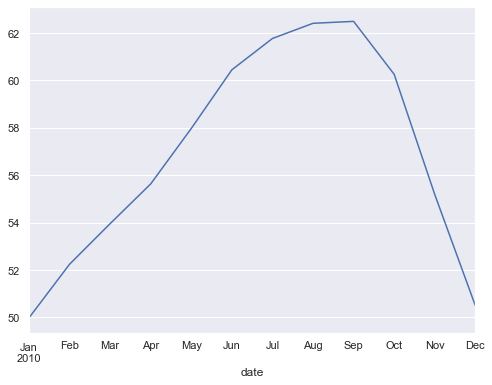

In [27]:
df.resample('M').mean().temp.plot() ## visual answer

September is the hottest month on average

#### Question 6: Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [29]:
diff_df = df.resample('D').agg(['min','max']) ## making my multi index resample

diff_df.head()

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [31]:
diff_df.columns ## looking at the multi index formatting

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [32]:
## making my variance column by subtracting the multi indexes

diff_df['variance'] = diff_df[('temp', 'max')] - diff_df[('temp', 'min')]

diff_df.head()

temp       variance
             min   max         
date                           
2010-01-01 45.80 53.30     7.50
2010-01-02 46.00 53.40     7.40
2010-01-03 46.10 53.50     7.40
2010-01-04 46.10 53.60     7.50
2010-01-05 46.10 53.80     7.70

In [36]:
## code answer by resampling by month and sorting the average in desceding order

diff_df.resample('M').mean().sort_values(by = 'variance', ascending = False)

temp       variance
             min   max         
date                           
2010-09-30 56.90 71.31    14.40
2010-07-31 56.05 70.02    13.98
2010-06-30 54.48 68.43    13.95
2010-08-31 56.94 70.81    13.87
2010-10-31 54.93 68.36    13.43
2010-05-31 52.40 65.31    12.91
2010-04-30 50.33 62.65    12.32
2010-03-31 49.24 60.09    10.85
2010-11-30 50.78 61.01    10.24
2010-02-28 48.06 57.55     9.49
2010-01-31 46.31 54.65     8.34
2010-12-31 47.03 54.95     7.93

<AxesSubplot:xlabel='date'>

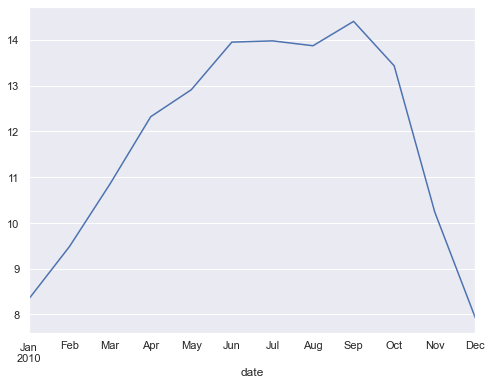

In [37]:
diff_df.resample('M').mean().variance.plot()

The month with the highest daily temperature variability is September